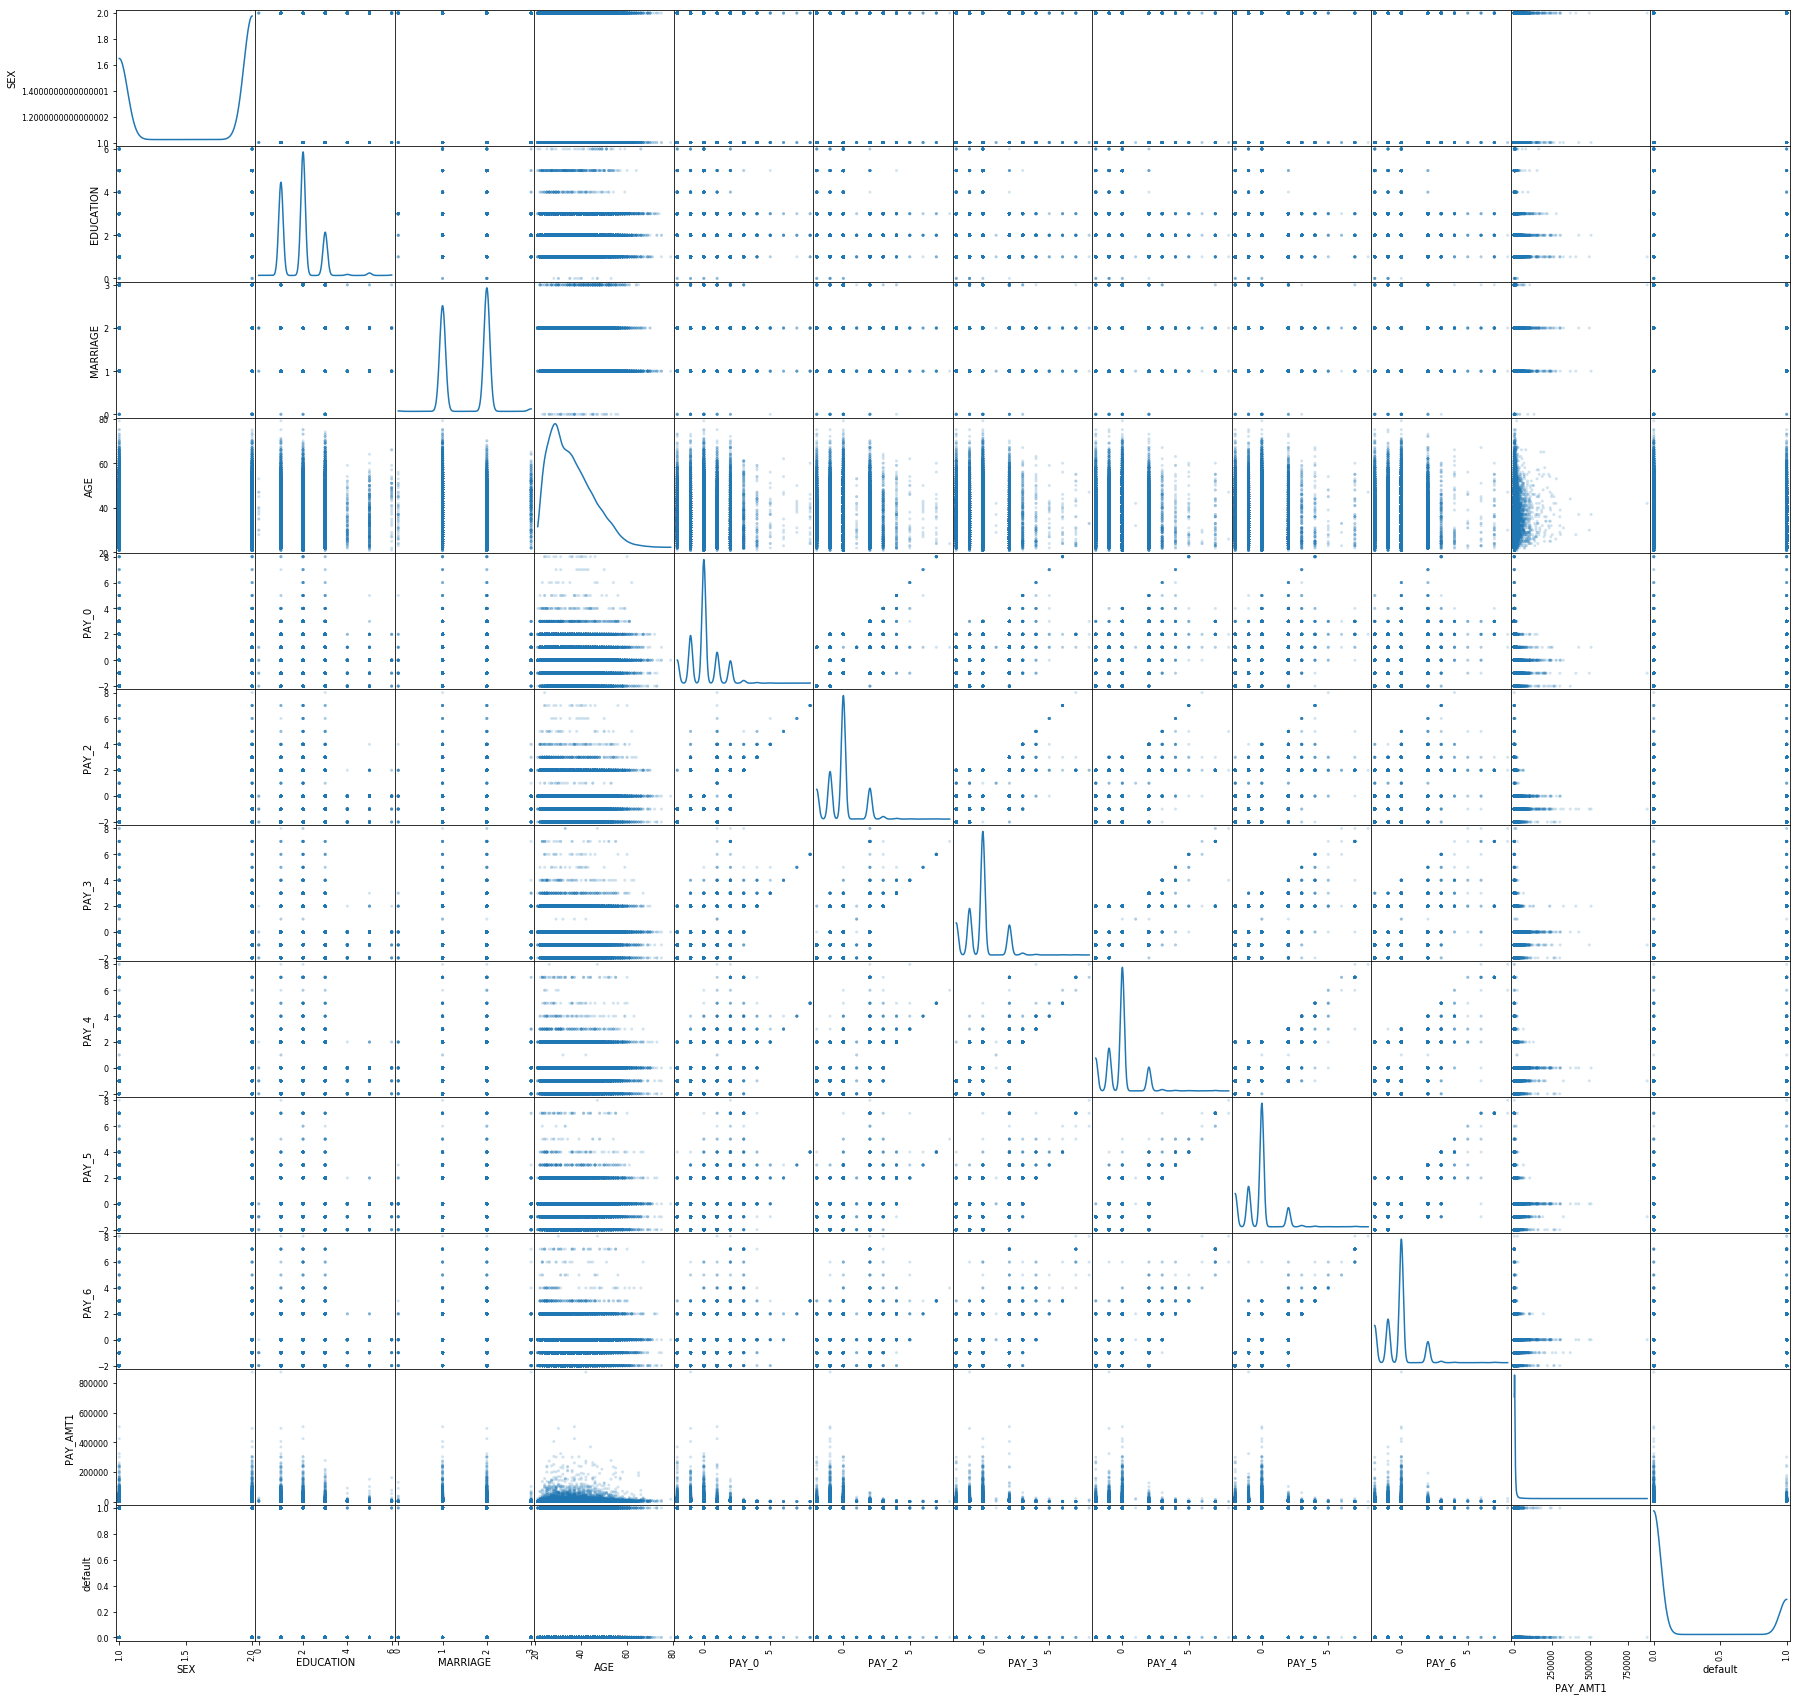

In [2]:
%matplotlib inline

# Pandas is an important data manipulation library
# You don't have to use it for your project, but I include it
# here so you know about it.

import pandas
import matplotlib.pyplot as plt
from scipy import stats

# Import models

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

# And import the feature selection mechanism

from sklearn.feature_selection import RFE


names = ['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4','PAY_5', 'PAY_6', 'PAY_AMT1','default']
dataframe = pandas.read_csv('default.csv', names=names)

array = dataframe.values
X = array[:,0:11]
y = array[:,-1]


from pandas.plotting import scatter_matrix
scatter_matrix(dataframe, alpha=0.2, figsize=(30, 30), diagonal='kde')
plt.show()



In [ ]:
# prepare configuration for cross validation test harness
seed = 1

# prepare models
models = []
models.append(('ZR', DummyClassifier(strategy="most_frequent")))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KN5', KNeighborsClassifier()))
models.append(('KN10', KNeighborsClassifier(n_neighbors=10)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
#models.append(('LIN', SVC(kernel='linear',gamma='auto')))
models.append(('RF',RandomForestClassifier(n_estimators=100)))
models.append(('NN',MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)))

# evaluate each model
# performing a 10-fold cross-validation each time
# (n_splits = 10), specifying 'accuracy' as my measure

results = []
classifiers = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	classifiers.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(classifiers)
plt.show()


